In [1]:
import pandas as pd
np = pd.np
import matplotlib.pyplot as plt

In [4]:
#suffix = '2019_Feb_28'
suffix = '2019_Oct_16'
df = pd.read_csv('../data/kaiterra/kaiterra_fieldeggid_15min_{}_panel.csv'.format(suffix), index_col=[0,1], parse_dates=True)

In [5]:
df.sort_index(inplace=True)
df

pm25        pm10
field_egg_id timestamp_round                            
113E         2018-03-01 00:00:00         NaN         NaN
             2018-03-01 00:15:00         NaN         NaN
             2018-03-01 00:30:00         NaN         NaN
             2018-03-01 00:45:00         NaN         NaN
             2018-03-01 01:00:00         NaN         NaN
             2018-03-01 01:15:00         NaN         NaN
             2018-03-01 01:30:00         NaN         NaN
             2018-03-01 01:45:00         NaN         NaN
             2018-03-01 02:00:00         NaN         NaN
             2018-03-01 02:15:00         NaN         NaN
             2018-03-01 02:30:00         NaN         NaN
             2018-03-01 02:45:00         NaN         NaN
             2018-03-01 03:00:00         NaN         NaN
             2018-03-01 03:15:00         NaN         NaN
             2018-03-01 03:30:00         NaN         NaN
             2018-03-01 03:45:00         NaN         NaN
             2018-03-01 04:00:00         NaN         NaN
             2018-03-01 04:15:00         NaN         NaN
             2018-03-01 04:30:00         NaN         NaN
             2018-03-01 04:45:00         NaN         NaN
             2018-03-01 05:00:00         NaN         NaN
             2018-03-01 05:15:00         NaN         NaN
             2018-03-01 05:30:00         NaN         NaN
             2018-03-01 05:45:00         NaN         NaN
             2018-03-01 06:00:00         NaN         NaN
             2018-03-01 06:15:00         NaN         NaN
             2018-03-01 06:30:00         NaN         NaN
             2018-03-01 06:45:00         NaN         NaN
             2018-03-01 07:00:00         NaN         NaN
             2018-03-01 07:15:00         NaN         NaN
...                                      ...         ...
EAC8         2019-10-16 08:00:00  115.000000  139.333333
             2019-10-16 08:15:00  111.666667  135.000000
             2019-10-16 08:30:00  111.333333  134.000000
             2019-10-16 08:45:00  105.333333  123.666667
             2019-10-16 09:00:00  105.333333  124.666667
             2019-10-16 09:15:00  107.000000  128.000000
             2019-10-16 09:30:00  106.666667  128.000000
             2019-10-16 09:45:00  104.333333  122.333333
             2019-10-16 10:00:00  106.000000  127.000000
             2019-10-16 10:15:00  104.333333  126.333333
             2019-10-16 10:30:00  109.000000  130.666667
             2019-10-16 10:45:00  115.333333  138.000000
             2019-10-16 11:00:00  128.666667  161.333333
             2019-10-16 11:15:00  125.000000  158.333333
             2019-10-16 11:30:00  117.666667  143.333333
             2019-10-16 11:45:00  116.333333  142.666667
             2019-10-16 12:00:00  122.000000  151.666667
             2019-10-16 12:15:00  124.666667  147.000000
             2019-10-16 12:30:00  127.333333  153.333333
             2019-10-16 12:45:00  124.666667  150.333333
             2019-10-16 13:00:00  119.333333  148.000000
             2019-10-16 13:15:00  140.000000  173.000000
             2019-10-16 13:30:00  138.333333  167.333333
             2019-10-16 13:45:00  223.666667  280.000000
             2019-10-16 14:00:00  178.333333  231.666667
             2019-10-16 14:15:00  139.000000  175.333333
             2019-10-16 14:30:00  127.666667  162.333333
             2019-10-16 14:45:00  123.666667  152.333333
             2019-10-16 15:00:00  117.000000  142.000000
             2019-10-16 15:15:00         NaN         NaN

[1598408 rows x 2 columns]

In [9]:
locs_df = pd.read_csv('../data/kaiterra/locs_new.csv', index_col=0)

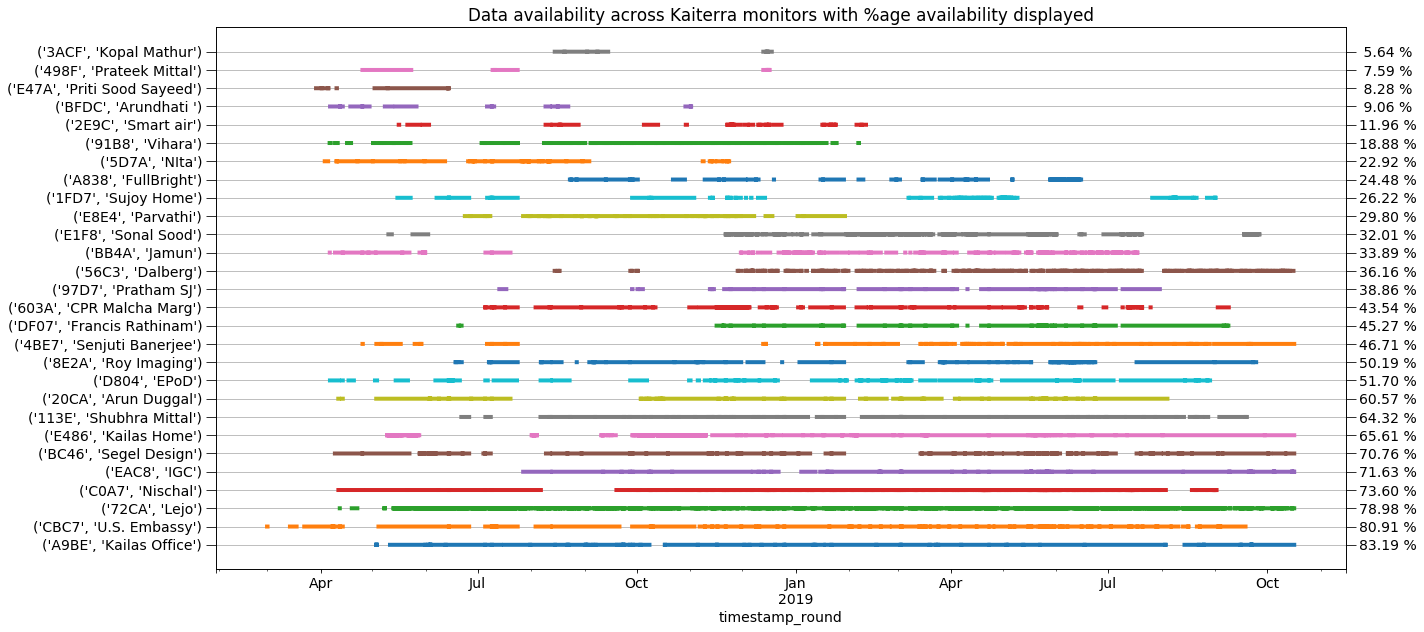

In [10]:
# display availability based on percent counts
grouped = df.groupby(level=0)
validfracs = (grouped.pm25.count() / grouped.pm25.size())
validfracs.sort_values(ascending=False, inplace=True)

plt.rc('font', size=14)

fig = plt.figure(figsize=(20,9))
ax = fig.add_subplot(111)

for count, name in enumerate(validfracs.index, 1):
    # plot the data availability
    group = grouped.get_group(name)
    group.reset_index(level=0, drop=True, inplace=True)
    group.pm25.where(np.isnan(group.pm25), other=count).plot(lw=4)

ax.set_yticks(np.arange(1,count+1))
#ax.set_yticklabels([(name, grouped.get_group(name).location[0]) for name in validfracs.index])
ax.set_yticklabels([(name, locs_df.location[name]) for name in validfracs.index])
ax.tick_params(axis='y', right=0, left=1, length=10)
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks(ax.get_yticks())
ax2.set_yticklabels(['{:5.2f} %'.format(val*100) for val in validfracs])
ax2.tick_params(axis='y', right=1, left=0, length=10)
ax.set_title('Data availability across Kaiterra monitors with %age availability displayed')
ax.grid(axis='y')
fig.tight_layout()
plt.show()

In [11]:
#fig.savefig('data/datagaps_kaiterra_fieldeggs_{}_long.png'.format(suffix))
#fig.savefig('data/datagaps_kaiterra_fieldeggs_{}_long.pdf'.format(suffix))
fig.savefig('../figures/datagaps_kaiterra_fieldeggs_{}_long.png'.format(suffix))
fig.savefig('../figures/datagaps_kaiterra_fieldeggs_{}_long.pdf'.format(suffix))

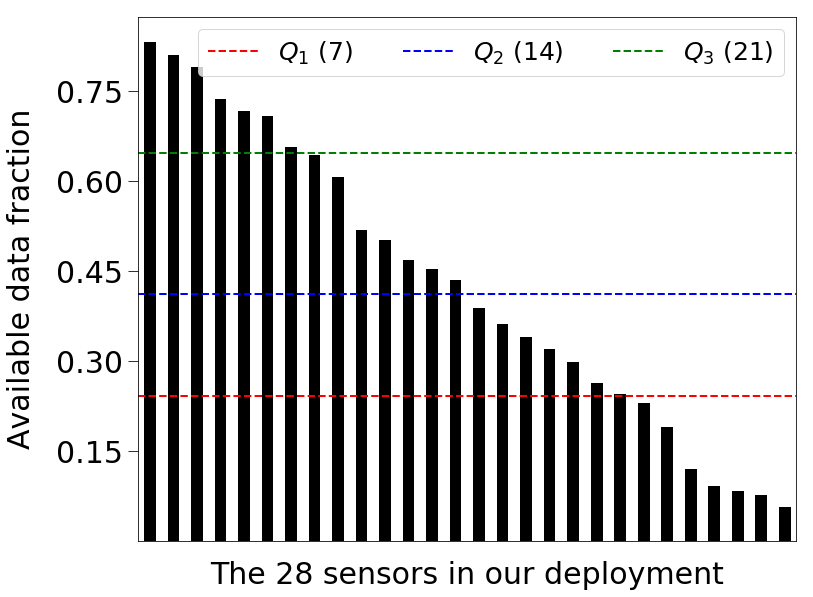

In [12]:
# display availability based on percent counts
grouped = df.groupby(level=0)
validfracs = (grouped.pm25.count() / grouped.pm25.size())
validfracs.sort_values(ascending=False, inplace=True)

pt1 = np.percentile(validfracs.values, 25)
pt2 = np.percentile(validfracs.values, 50)
pt3 = np.percentile(validfracs.values, 75)

n1 = validfracs.size // 4
n2 = 2*n1
n3 = 3*n1

plt.rc('font', size=30)
plt.rc('ps', useafm=True)
plt.rc('pdf', use14corefonts=True)

plt.figure(figsize=(12,9))
# validfracs.plot(kind='hist', bins=30)
# plt.xlim(0,1)
validfracs.plot(kind='bar', color='k', label='')
# plt.bar(validfracs.values, color='k')
xmin, xmax = plt.xlim()
plt.hlines([pt1], xmin, xmax, colors='r', linestyles='--', lw=2, label=r'$Q_1$ ({})'.format(n1))
plt.hlines([pt2], xmin, xmax, colors='b', linestyles='--', lw=2, label=r'$Q_2$ ({})'.format(n2))
plt.hlines([pt3], xmin, xmax, colors='g', linestyles='--', lw=2, label=r'$Q_3$ ({})'.format(n3))
plt.xlim(xmin, xmax)
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(6, prune='both'))
plt.tick_params(length=10, pad=5, labelbottom=0, bottom=0)
plt.xlabel('The {} sensors in our deployment'.format(validfracs.size), labelpad=20)
plt.ylabel('Available data fraction', labelpad=20)
plt.legend(ncol=3, fontsize='small')
plt.tight_layout()
#plt.savefig('data/datagaps_kaiterra_fieldeggs_2019_Feb_28_bar.eps')
plt.savefig('../figures/datagaps_kaiterra_fieldeggs_{}_bar.eps'.format(suffix))
plt.show()

In [13]:
plt.close('all')